# Assignment: Data Wrangling

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about tidy datasets which has a specific framework for structuring data to easily clean and manipulate data for data analysis.

2. The "tidy data standard" is intented to be a basis/method for structuring data for analysis in an easy and efficient way.

3. The first part, "Like families, tidy datasets are all alike but every messy dataset is messy in its own way.", means you can approach a dataset (clean and transform) in a similar way, but each dataset has its own problems/errors/issues to deal with and fix. The second part, "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.", means that the data is easy to understand when it is already layed out for you, but when given the dataset, it can be difficult to figure out/decide what should be your observations and what should be your variables. Someone else working with the dataset might choose a different set of observations and variables.

4.
values:
variables:
observations:

5.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [4]:
import os
print(os.getcwd())

/content


Q2 #1

In [5]:
#1
import pandas as pd
airbnb = pd.read_csv('/content/airbnb_hw.csv', low_memory = False)
airbnb['Price'].unique()
# There are commas for any number abbove 999, so we need to take them out since these are numeric

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [8]:
airbnb['Price'].dtype
# (price data is an object here >> need to change to numeric)

dtype('O')

In [9]:
# take out commas
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '226'

In [33]:
# change from object to numberic data type
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors = 'coerce')
# check data type
airbnb['Price'].dtype

dtype('int64')

Q2 #2

In [34]:
sharks = pd.read_csv('/content/sharks.csv', low_memory = False)
sharks.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
sharks['Type'].unique()

# there looks to be a couple categories that are the same including Boating, Boat, and Boatomg (which was a typo)
# they should be consolidated into one category

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [36]:
# consolidate columns that mean the same thing or could fit under one category
type = sharks['Type']
type = type.replace(['Boating','Boat','Boatomg', 'Watercraft', 'Sea Disaster'], 'Water Incident')
type = type.replace(['Questionable', 'Unconfirmed','Unverified', 'Invalid', 'Under investigation'], 'Unconfirmed')
type.unique()

array(['Unprovoked', 'Provoked', 'Unconfirmed', 'Water Incident', nan],
      dtype=object)

In [38]:
type.value_counts()

# now we have four categories within the Type category that make sense and are not repetitive. This is much easier to analyze.

Unprovoked        4716
Provoked           593
Water Incident     583
Unconfirmed        565
Name: Type, dtype: int64

In [42]:
# put back into Type column in the sharks dataframe

sharks['Type'] = type

<Axes: >

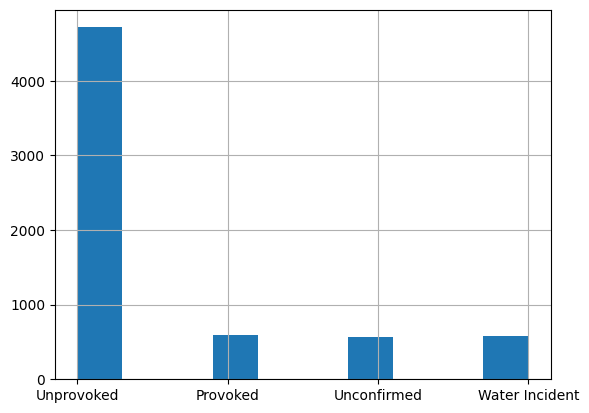

In [47]:
# graph to see what attacks were unprovoked vs. provoked as well as how many were unconfirmed or just from a water vehicle
# by a large amount, a majority were unprovoked!
sharks['Type'].hist(bins=10)

Q2 #3

In [50]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False)

In [53]:
pretrial['WhetherDefendantWasReleasedPretrial'].value_counts()

# possible values are 1,0,9. We don't know what 9 means so it needs to be taken out.

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [58]:
import numpy as np
released = pretrial['WhetherDefendantWasReleasedPretrial']
released = released.replace(9, np.nan)
released.value_counts()

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [60]:
# put back into WhetherDefendantWasReleasedPretrial column of pretrial df
pretrial['WhetherDefendantWasReleasedPretrial'] = released
# check to make sure 9s are gone
pretrial['WhetherDefendantWasReleasedPretrial'].value_counts()

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

Q2 #4

In [100]:
pretrial['ImposedSentenceAllChargeInContactEvent'].head(25)
# this data looks crazy, first need to understand what each number means and if any need to be taken out

0                     
1                   60
2                   12
3     .985626283367556
4                     
5                   12
6                   36
7                    6
8                   24
9                   12
10    5.91375770020534
11                    
12                    
13                 120
14                  24
15                    
16                    
17                  12
18                    
19                  12
20                  12
21                    
22                    
23                  12
24                    
Name: ImposedSentenceAllChargeInContactEvent, dtype: object

In [81]:
sentence = pretrial['ImposedSentenceAllChargeInContactEvent']
sentence.dtype

# sentence is object data type, needs to be numeric integer


dtype('O')

In [82]:
# convert from object to number (this makes more sense to handle the data)
sentence = pd.to_numeric(sentence, errors = 'coerce')
sentence.dtype

dtype('float64')

In [83]:
null_sum = np.sum(sentence.isnull())
null_sum

# this tells us there are 9053 null values

9053

In [98]:
# need to do something about blank values
# need to change to value of zero
sentence = sentence.replace(np.nan, 0)
sentence.head(10)

0     0.0
1    60.0
2     0.0
3     0.0
4     0.0
5    12.0
6     0.0
7     6.0
8     0.0
9     0.0
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64

In [84]:
sentype = pretrial['SentenceTypeAllChargesAtConvictionInContactEvent']
sentype.head(6)


0    9
1    0
2    1
3    1
4    4
5    0
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64

In [88]:
print(pd.crosstab(null_sum, sentype))

# according to the codebook:
# 1 means "Probation/no incarceration"
# 4 means "Other, all charges in cohort contact resulted in pending, dismissed, deferred, etc."
# 9 means "Not applicable (e.g., disposition record not found, or unknown)"

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
row_0                                                                       
9053                                              8720  4299  914  8779  274


In [93]:
# any value "SentenceTypeAllChargesAtConvictionInContactEven" that is 1,4 or 9 needs to be changed to 0 (months)
# because these individuals did not serve any time
sentence = sentence.mask(sentype == 1, 0)
sentence = sentence.mask(sentype == 4, 0)
sentence = sentence.mask(sentype == 9, 0)

In [99]:
sentence.value_counts()

# this is good, more 0's (the count went up to 18305)
# all values that were null or had a sentence type that should not have had a sentence greater than 0 months has been changed to 0 months

0.000000      18305
0.985626        765
12.000000       616
3.000000        442
6.000000        372
              ...  
222.000000        1
20.000000         1
294.000000        1
336.000000        1
0.459959          1
Name: ImposedSentenceAllChargeInContactEvent, Length: 308, dtype: int64

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?